<a href="https://colab.research.google.com/github/TranThiDieuHien/pythonbasics/blob/master/BT_ANOVA_Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [2]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [7]:
cl_df = pd.io.stata.read_stata("cholesterol.dta")

In [27]:
cl_df

,race,agegrp,chol,agemidpt,meangrp
0,White,10–19,188.962997,15.0,179.853088
1,Black,10–19,179.729446,15.0,179.853088
2,Other,10–19,169.779404,15.0,179.853088
3,Black,10–19,176.760956,15.0,179.853088
4,Other,10–19,182.571182,15.0,179.853088
...,...,...,...,...,...
70,Black,60–79,208.904495,70.0,220.615295
71,Black,60–79,222.540878,70.0,220.615295
72,White,60–79,213.022552,70.0,220.615295
73,White,60–79,196.742615,70.0,220.615295


So sánh trung bình Cholesterol giữa các nhóm sắc tộc
Phát biểu giả thuyết:

$H_{0}$: Không có sự khác biệt về trung bình cholesterol giữa 3 nhóm sắc tộc

$H_{1}$: Có ít nhất 2 nhóm sắc tộc có trung bình cholesterol khác nhau

**STEP 1: Chạy mô hình kiểm định ANOVA**

In [29]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [30]:
model = ols('chol ~ C(race)', data=cl_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [31]:
anova_table

,sum_sq,df,F,PR(>F)
C(race),669.278235,2.0,1.108161,0.33573
Residual,21742.341205,72.0,NaN,NaN


**STEP 2: Kiểm tra các điều kiện cho kiểm định Anova**

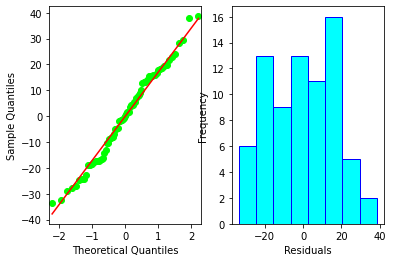

In [36]:
fig, ax = plt.subplots(1, 2)
# model.resid -> các giá trị thặng dư của model: dùng nó để kiểm tra điều kiện cho Anova

sm.qqplot(model.resid, line='s', ax=ax[0], color = 'lime')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k', color = 'cyan', edgecolor ='blue') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()
#stats.shapiro(model.resid)

In [37]:
# Sử dụng kiểm định shapiro cho chuẩn/không chuẩn
stats.shapiro(model.resid)

(0.9812602996826172, 0.3320319652557373)

**STEP 3: Kiểm định hậu nghiệm cho Anova (one-way)**

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [39]:
tukey = pairwise_tukeyhsd(endog=cl_df['chol'],
                          groups=cl_df['race'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Black,Other,-5.7153,0.4808,-17.4778,6.0473,False
Black,White,-6.8147,0.3542,-18.5773,4.9478,False
Other,White,-1.0995,0.9,-12.862,10.6631,False


**Mô tả trực quan hóa cho phần hậu nghiệm**

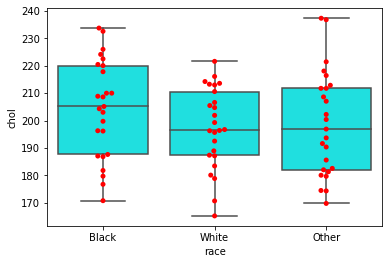

In [42]:
# Kỹ thuật EDA:
sns.boxplot(x='race', y='chol', data=cl_df, color='cyan')
sns.swarmplot(x="race", y="chol", data=cl_df, color='red')
plt.show()

In [43]:
race_chol_df = cl_df[['race', 'chol']].copy()
white = race_chol_df[race_chol_df['race']=='White']
black = race_chol_df[race_chol_df['race']=='Black']
other = race_chol_df[race_chol_df['race']=='Other']

In [44]:
p = {}
p['f_score'], p['p_value'] = stats.f_oneway(white['chol'],black['chol'],other['chol'])
results(p)

,f_score,p_value,KetLuan
,1.108161,0.33573,Chấp nhận H0 với mức ý nghĩa 0.05
